## Normality test

testo da aggiungere

Questo modulo implementa il test di normalità. Usa le funzioni in data_collection

In [1]:
from scipy.stats import norm, anderson
from math import pi
import pandas as pd
import numpy as np

# We want to study the distribution of points in a certain dataset.
# If the process, for example, is stationary (OU-like), we expect the distribution to be gaussian
# We can't select neighbouring points, as they are correlated, so we have to sample the dataset every lambda points approximately
# (formally, a distanca d which is higher then the decorrelation time of the process)
# To make this statistic more robust, we can repeat the process multiple times choosing different sampling of the dataset and average the resulting distribution

## WIP !!! what if we chose a gaussian sampling? (The distance between two points is gaussian distributed)
def assess_normality(dataset : pd.Series, lambda_ : int, n : int, ax: None) -> float:

    x = np.array([0])
    # repeat the process n times
    for i in range(n):
        # we will sample the dataset choosing a value every lambda points on average (poisson distr)
        choice = [np.random.randint(lambda_)]  #choice is the vector of indices of chosen values
        for i in range(1, int(len(dataset)/lambda_) ):
            l = np.random.poisson(lambda_)
            if (int(choice[-1]+l) > len(dataset)-1):
                break
            choice.append(int(choice[-1]+l))
        #filtered data, chosen approx every lambda points
        chosen_data = (dataset.values)[choice]
        x = np.concatenate((x,chosen_data), axis = 0)
    if (ax is not None):
        bin_edges = np.arange(np.min(x), np.max(x), 50)
        ax.hist(x, bins = "auto", density=True)
        ax.set_title(f"Input dataset has {len(dataset)} points"+ '\n'+f"Sampling every ~ {lambda_} points, repeating {n} times " + '\n' + f"Total number of points in the distr: {len(x)}" )


    return anderson(x).statistic

26.430728232143338 6.3518763775368825 41.37863366452848


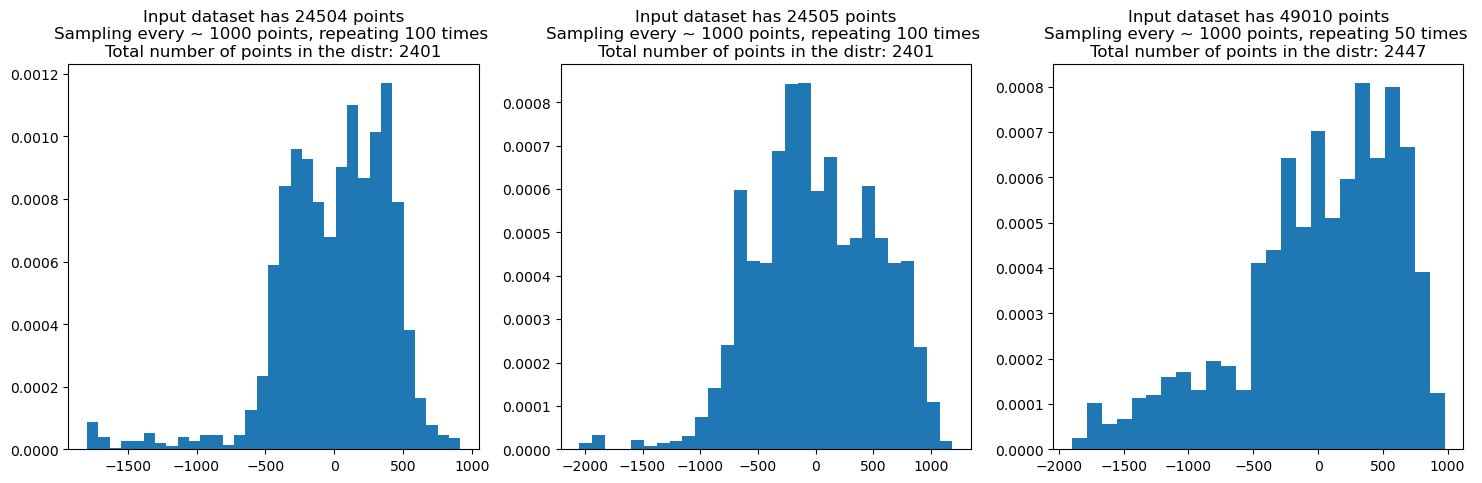

In [2]:
import meanreversion as mr
import matplotlib.pyplot as plt

# gathering data and removing trends
df = mr.load_asset("data/DAX_M15_202005242300_202411131015.csv")
mesh2 = np.array([0,int(len(df)/4), int(len(df)/2), int(len(df))])
arr = mr.removeTrend(df, mesh2)


fig, axs = plt.subplots(1, 3, figsize=(18, 5))
normality1 = assess_normality(arr[0], 1000,100, axs[0])
normality2 = assess_normality(arr[1], 1000,100, axs[1])
normality3 = assess_normality(arr[2], 1000,50, axs[2])
print(normality1, normality2, normality3)